<a href="https://colab.research.google.com/github/relionrk/stock-market-data/blob/main/Stock_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantitative Analysis of the Stock Market: A Step-by-Step Process

* Define Objectives: Clearly establish the goals and questions you aim to address through the analysis.
* Identify KPIs: Determine the key performance indicators (KPIs) that are most relevant to your analysis, such as price-to-earnings ratio, return on equity, etc.
* Data Collection: Gather historical stock market data, including but not limited to prices, trading volumes, and other pertinent financial indicators.
Data Preprocessing: Clean and prepare the data by handling missing values, outliers, and potential errors.
* Exploratory Analysis: Conduct an initial analysis to understand data distributions, identify patterns, and explore correlations between variables.
* Quantitative Strategies: Implement various quantitative strategies, such as statistical modeling, technical analysis, or algorithmic trading, to derive insights and make informed decisions."

In [94]:
!pip install -U kaleido
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install -U kaleido plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pio.renderers.default = "colab"

In [95]:
import kaleido
print(kaleido.__version__)

0.2.1


In [96]:
df=pd.read_csv('https://raw.githubusercontent.com/relionrk/stock-market-data/refs/heads/main/stocks.csv')

In [97]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [98]:
df.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


To perform a quantitative analysis, we can explore various statistical concepts like descriptive statistics, time series analysis, correlation analysis, and more. Here are some potential analyses we can perform:

* Descriptive Statistics: Summary statistics (mean, median, standard deviation, etc.) for each stock.
Time Series Analysis: Trends and patterns over time, especially for closing prices.
* Volatility Analysis: How much the stock price fluctuates over a period.
* Correlation Analysis: How stock prices of different companies are related to each other.

* Risk-Return Trade-off Analysis: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.

Let’s implement all these concepts of Quantitative Analysis of the stock market one by one.

In [99]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


Descriptive Statistics will provide summary statistics for each stock in the dataset. We’ll look at measures such as mean, median, standard deviation, and more for the open prices:


In [100]:
df_stock=df.groupby('Ticker')['Open'].describe()

In [101]:
df_stock

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,62.0,157.779839,7.224608,144.380005,151.489998,158.400002,164.702503,170.979996
GOOG,62.0,100.381919,6.197598,89.540001,94.532499,102.680000,105.859999,107.800003
MSFT,62.0,274.735969,17.324808,246.550003,257.410004,277.110001,285.825005,307.760010
NFLX,62.0,328.110643,18.467142,287.339996,317.137497,325.649994,340.674995,372.410004


Next, we’ll proceed with the Time Series Analysis to examine trends and patterns over time, focusing on the closing prices:

In [102]:
new_df=df
new_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [103]:
new_df = df.reset_index()  # Reset the index to bring 'Date' back as a column
new_df['Date'] = pd.to_datetime(new_df['Date'])  # Convert to datetime
new_df.set_index('Date', inplace=True)

In [104]:
new_df

,index,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2023-02-07,0,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,1,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,2,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,3,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
2023-02-13,4,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
2023-05-01,243,GOOG,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
2023-05-02,244,GOOG,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
2023-05-03,245,GOOG,106.220001,108.129997,105.620003,106.120003,106.120003,17116300


In [105]:
# Reset the index to make 'Date' a column again
pivot_df = new_df.reset_index().pivot(index='Date', columns='Ticker', values='Open')

In [106]:
pivot_df

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,150.639999,103.629997,260.529999,358.510010
2023-02-08,153.880005,102.690002,273.200012,360.019989
2023-02-09,153.779999,100.540001,273.799988,372.410004
2023-02-10,149.460007,95.739998,261.529999,359.160004
2023-02-13,150.949997,95.010002,267.640015,349.500000
...,...,...,...,...
2023-05-01,169.279999,107.720001,306.970001,329.440002
2023-05-02,170.089996,107.660004,307.760010,325.000000
2023-05-03,169.500000,106.220001,306.619995,317.549988


In [107]:
!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [108]:
# Assuming 'pivot_df' from previous cell is the intended data
pivot_data = pivot_df

fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
    fig.add_trace(
        go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
        row=1, col=1
    )
fig



The above plot displays the time series of the closing prices for each stock (AAPL, GOOG, MSFT, NFLX) over the observed period. Here are some key observations:

1) Trend: Each stock shows its unique trend over time. For instance, AAPL and MSFT exhibit a general upward trend in this period.

2) Volatility: There is noticeable volatility in the stock prices. For example, NFLX shows more pronounced fluctuations compared to others.

3) Comparative Performance: When comparing the stocks, MSFT and NFLX generally trade at higher price levels than AAPL and GOOG in this dataset.

In [109]:
fig.update_layout(
    title_text='Time Series of opening Prices',
    xaxis_title='Date',
    yaxis_title='opening Price',
    legend_title='Ticker',
    showlegend=True
)


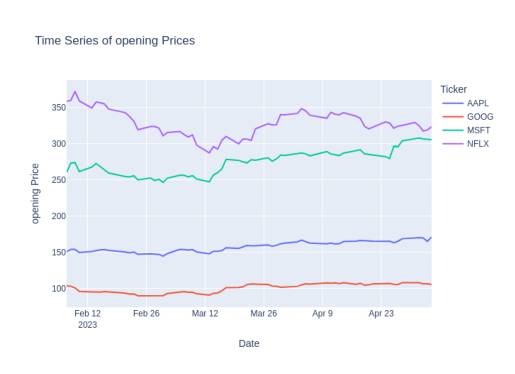

In [110]:
pio.write_image(fig, "plot.png", engine="kaleido")

# Show the saved image using Matplotlib
img = plt.imread("plot.png")
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

Next, let’s focus on Volatility Analysis. We’ll calculate and compare the volatility (standard deviation) of the closing prices for each stock. It will give us an insight into how much the stock prices fluctuated over the period:

In [111]:
import plotly.express as px


In [112]:
pivot_df

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-07,150.639999,103.629997,260.529999,358.510010
2023-02-08,153.880005,102.690002,273.200012,360.019989
2023-02-09,153.779999,100.540001,273.799988,372.410004
2023-02-10,149.460007,95.739998,261.529999,359.160004
2023-02-13,150.949997,95.010002,267.640015,349.500000
...,...,...,...,...
2023-05-01,169.279999,107.720001,306.970001,329.440002
2023-05-02,170.089996,107.660004,307.760010,325.000000
2023-05-03,169.500000,106.220001,306.619995,317.549988


In [113]:
vol=pivot_data.std().sort_values(ascending=False)

In [114]:

vol


,0
Ticker,
NFLX,18.467142
MSFT,17.324808
AAPL,7.224608
GOOG,6.197598


In [115]:
fig=px.bar(vol,vol.index,
             y=vol.values,
             labels={'y': 'Standard Deviation', 'x': 'Ticker'},
             title='Volatility of Closing Prices (Standard Deviation)')
fig.show()

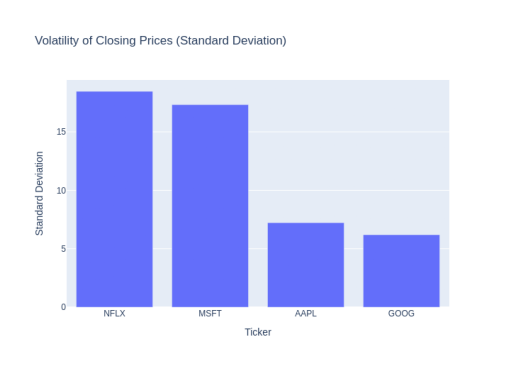

In [116]:
pio.write_image(fig, "plot.png", engine="kaleido")

# Show the saved image using Matplotlib
img = plt.imread("plot.png")
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

The bar chart and the accompanying data show the volatility (measured as standard deviation) of the closing prices for each stock. Here’s how they rank in terms of volatility:

* NFLX: Highest volatility with a standard deviation of approximately 18.55.

* MSFT: Next highest, with a standard deviation of around 17.68.

* AAPL: Lower volatility compared to NFLX and MSFT, with a standard deviation of about 7.36.

* GOOG: The least volatile in this set, with a standard deviation of approximately 6.28.

It indicates that NFLX and MSFT stocks were more prone to price fluctuations during this period compared to AAPL and GOOG.

Next, we’ll perform a Correlation Analysis to understand how the stock prices of these companies are related to each other:

In [117]:
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=correlation_matrix,
                    x=correlation_matrix.columns,
                    y=correlation_matrix.columns,
                    colorscale='blues',
                    colorbar=dict(title='Correlation'),
                    ))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

# Show the figure
fig.show()

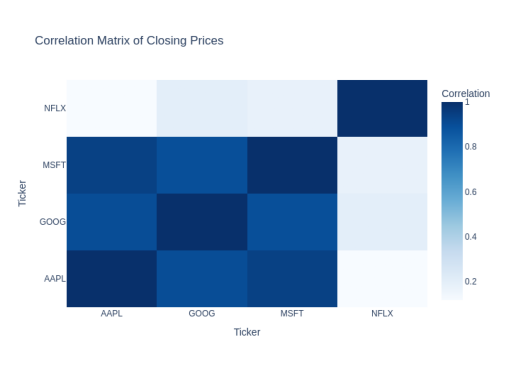

In [118]:
pio.write_image(fig, "plot.png", engine="kaleido")

# Show the saved image using Matplotlib
img = plt.imread("plot.png")
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

The heatmap above displays the correlation matrix of the closing prices of the four stocks (AAPL, GOOG, MSFT, NFLX). Here’s what the correlation coefficients suggest:


* Values close to +1 indicate a strong positive correlation, meaning that as one stock’s price increases, the other tends to increase as well.
* Values close to -1 indicate a strong negative correlation, where one stock’s price increase corresponds to a decrease in the other.
* Values around 0 indicate a lack of correlation.

From the heatmap, we can observe that there are varying degrees of positive correlations between the stock prices, with some pairs showing stronger correlations than others. For instance, AAPL and MSFT seem to have a relatively higher positive correlation.

In [119]:
daily_returns = pivot_data.pct_change().dropna()
daily_returns

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-08,0.021508,-0.009071,0.048632,0.004212
2023-02-09,-0.000650,-0.020937,0.002196,0.034415
2023-02-10,-0.028092,-0.047742,-0.044814,-0.035579
2023-02-13,0.009969,-0.007625,0.023363,-0.026896
2023-02-14,0.007751,-0.003684,0.018794,0.023033
...,...,...,...,...
2023-05-01,0.004689,-0.000742,0.009736,0.012914
2023-05-02,0.004785,-0.000557,0.002574,-0.013477
2023-05-03,-0.003469,-0.013375,-0.003704,-0.022923


To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return.

We will then plot these values to visually assess the risk-return profile of each stock. Stocks with higher average returns and lower risk (standard deviation) are generally more desirable, but investment decisions often depend on the investor’s risk tolerance:

In [120]:
avg_daily_return = daily_returns.mean()
risk = daily_returns.std()


In [121]:
risk_return_df = pd.DataFrame({'Risk': risk, 'Average Daily Return': avg_daily_return})
risk_return_df

,Risk,Average Daily Return
Ticker,,
AAPL,0.013842,0.002172
GOOG,0.016382,0.000397
MSFT,0.018543,0.002793
NFLX,0.021029,-0.001460


In [122]:
fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return_df['Risk'],
    y=risk_return_df['Average Daily Return'],
    mode='markers+text',
    text=risk_return_df.index,
    textposition="top center",
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk (Standard Deviation)',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the plot
fig.show()

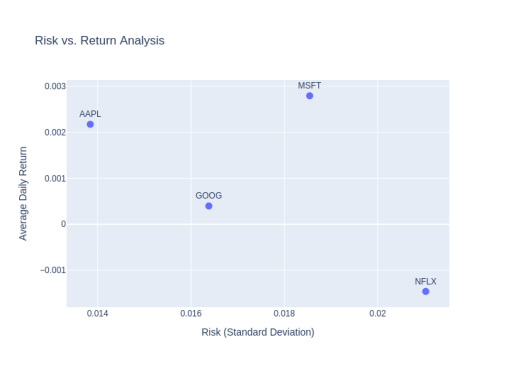

In [123]:
pio.write_image(fig, "plot.png", engine="kaleido")

# Show the saved image using Matplotlib
img = plt.imread("plot.png")
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

So, AAPL shows the lowest risk combined with a positive average daily return, suggesting a more stable investment with consistent returns. GOOG has higher volatility than AAPL and, on average, a slightly negative daily return, indicating a riskier and less rewarding investment during this period.

MSFT shows moderate risk with the highest average daily return, suggesting a potentially more rewarding investment, although with higher volatility compared to AAPL. NFLX exhibits the highest risk and a negative average daily return, indicating it was the most volatile and least rewarding investment among these stocks over the analyzed period.

**Summary**


So, this is how you can perform a Quantitative Analysis of the Stock Market using Python. Quantitative Analysis in the stock market is a financial methodology that utilizes mathematical and statistical techniques to analyze stocks and financial markets. I hope you liked this article on Quantitative Analysis of Stock Market using Python. Feel free to ask valuable questions in the comments section below.